# **logistic regression**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/User_Data.csv')


In [ ]:
# input
x = dataset.iloc[:, [2, 3]].values

# output
y = dataset.iloc[:, 4].values


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
		x, y, test_size = 0.25, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])


[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.89


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


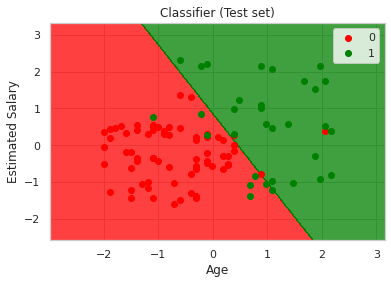

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


# **linear regression**



In [ ]:
#Import all library needed
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
reglin = pd.read_csv('50_Startups.csv')
reglin.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
reglin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
reglin.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


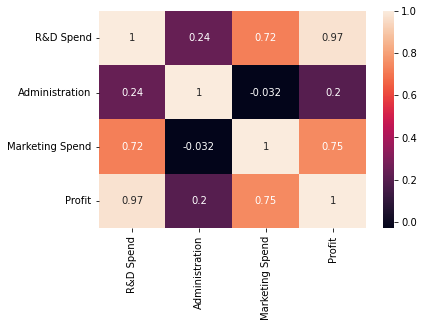

In [ ]:
#Atau Jika menggunakan heatmap
sns.heatmap(reglin.corr(), annot=True)

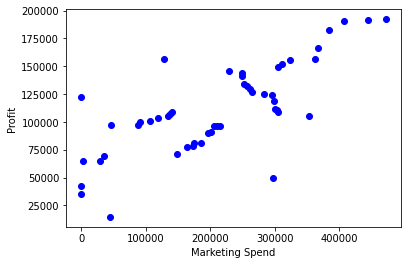

In [ ]:
plt.scatter(reglin['Marketing Spend'], reglin['Profit'], color='blue')
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

In [ ]:
#Type Your Code Here
features = ['R&D Spend', 'Marketing Spend']
X = reglin[features].values
Y = reglin.Profit

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=23)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


hasil uji Kolmogorov Smirnov 
  KstestResult(statistic=0.12495970531173806, pvalue=0.528936822420008)


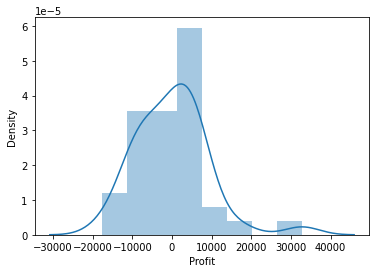

In [ ]:
#Type Your Code Here
y_predtrain = lin_reg.predict(X_train)
err = y_predtrain - Y_train
sns.distplot(err)

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm')
print('hasil uji Kolmogorov Smirnov \n ', norm_er)

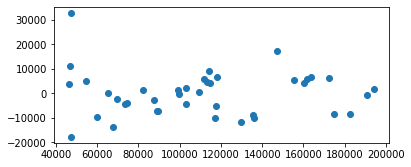

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_predtrain, err)

In [ ]:
vif = [variance_inflation_factor(X_train, i) for i in range(len(X_train.T))]
pd.DataFrame({'VIF': vif[0:]}, index=features)

,VIF
R&D Spend,6.637335
Marketing Spend,6.637335


In [ ]:
X_constant = sm.add_constant(X_train)                #Ingat lagi x1 = R&D, x2 =  Marketing
linreg = sm.OLS(Y_train,X_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     408.7
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           5.97e-26
Time:                        07:36:02   Log-Likelihood:                -421.18
No. Observations:                  40   AIC:                             848.4
Df Residuals:                      37   BIC:                             853.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.639e+04   2887.411     16.068      0.000    4.05e+04    5.22e+04
x1             0.8251      0.045     18.249      0.000       0.733       0.917
x2             0.0236      0.017      1.378      0.176      -0.011       0.058
==============================================================================
Omnibus:                       13.108   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.774
Skew:                          -0.964   Prob(JB):                     0.000228
Kurtosis:                       5.520   Cond. No.                     4.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Type Your Code Here
y_predtest = lin_reg.predict(X_test)

#MSE
MSE_train = mean_squared_error(Y_train, y_predtrain)
print ('Nilai MSE data training = ', MSE_train)
MSE_test = mean_squared_error(Y_test, y_predtest)
print('Nilai MSE data testing =', MSE_test)

#RMSE
RMSE_train = np.sqrt(MSE_train)
print('Nilai RMSE data training = ', RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print('Nilai RMSE data testing =', RMSE_test)

#MAE
MAE_train = mean_absolute_error(Y_train, y_predtrain)
print('Nilai MAE data training = ', MAE_train)
MAE_test = mean_absolute_error(Y_test, y_predtest)
print('Nilai MAE data testing = ', MAE_test)


Nilai MSE data training =  81897487.02005282
Nilai MSE data testing = 71176114.65887138
Nilai RMSE data training =  9049.72303554384
Nilai RMSE data testing = 8436.593782971382
Nilai MAE data training =  6843.0077696397175
Nilai MAE data testing =  5771.48200353918


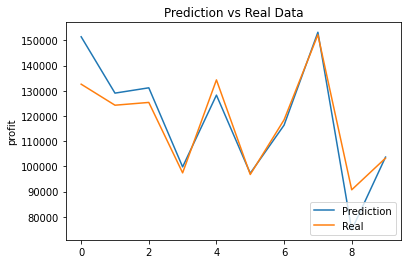

In [ ]:
#Type Your Code Here

#plotting data prediksi dan testing untuk membandingkan
plt.plot(y_predtest)
plt.plot(Y_test.values)

#to give title to the graph/figure
plt.title('Prediction vs Real Data')

#add y label
plt.ylabel('profit')

#adding legend to the plot/graph/figure
plt.legend(labels= ['Prediction', 'Real'],loc='lower right')


In [ ]:
print(f'R^2 score: {lin_reg.score(X, Y)}')

R^2 score: 0.9499067945573266


In [ ]:
linreg.summary()                   #Ingat lagi x1 = R&D, x2 =  Marketing

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     408.7
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           5.97e-26
Time:                        07:37:52   Log-Likelihood:                -421.18
No. Observations:                  40   AIC:                             848.4
Df Residuals:                      37   BIC:                             853.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.639e+04   2887.411     16.068      0.000    4.05e+04    5.22e+04
x1             0.8251      0.045     18.249      0.000       0.733       0.917
x2             0.0236      0.017      1.378      0.176      -0.011       0.058
==============================================================================
Omnibus:                       13.108   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.774
Skew:                          -0.964   Prob(JB):                     0.000228
Kurtosis:                       5.520   Cond. No.                     4.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model Lasso
Lasso_reg = Lasso(alpha=0.1).fit(X_train, Y_train)
y_predtrain_lasso = Lasso_reg.predict(X_train)
y_predtest_lasso = Lasso_reg.predict(X_test)

In [ ]:
#Model Ridge
Ridge_reg = Ridge(alpha=0.1).fit(X_train, Y_train)
y_predtrain_ridge = Ridge_reg.predict(X_train)
y_predtest_ridge = Ridge_reg.predict(X_test)

In [ ]:
#Support Vectore Regression
Sup_reg = SVR().fit(X_train, Y_train)
y_predtrain_svr = Sup_reg.predict(X_train)
y_predtest_svr = Sup_reg.predict(X_test)

In [ ]:
#Decision Tree Regrision
Dt_reg = DecisionTreeRegressor().fit(X_train, Y_train)
y_predtrain_svr = Dt_reg.predict(X_train)
y_predtest_svr = Dt_reg.predict(X_test)

In [ ]:
#MSE
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(Y_train, y_predtrain))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(Y_test, y_predtest), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(Y_train, y_predtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(Y_test, y_predtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(Y_train, y_predtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(Y_test, y_predtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR = ', mean_squared_error(Y_train, y_predtrain))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(Y_test, y_predtest), '\n')

print('Nilai MSE data training Regresi Dt = ', mean_squared_error(Y_train, y_predtrain))
print('Nilai MSE data testing Regresi Dt = ', mean_squared_error(Y_test, y_predtest), '\n')

Nilai MSE data training Regresi Linier =  81897487.02005282
Nilai MSE data testing Regresi Linier =  71176114.65887138 

Nilai MSE data training Regresi Lasso =  81897487.02005287
Nilai MSE data testing Regresi Lasso =  71176114.68561623 

Nilai MSE data training Regresi Ridge =  81897487.02005291
Nilai MSE data testing Regresi Ridge =  71176114.65834258 

Nilai MSE data training Regresi SVR =  81897487.02005282
Nilai MSE data testing Regresi SVR =  71176114.65887138 

Nilai MSE data training Regresi Dt =  81897487.02005282
Nilai MSE data testing Regresi Dt =  71176114.65887138 



In [ ]:
#Nilai R2
#Type Your Code here
print(f'R^2 score Regresi Linier: {lin_reg.score(X,Y)}')
print(f'R^2 score Regresi Lasso: {Lasso_reg.score(X,Y)}')
print(f'R^2 score Regresi Ridge: {Ridge_reg.score(X,Y)}')
print(f'R^2 score Regresi SVR: {Sup_reg.score(X,Y)}')
print(f'R^2 score Regresi Dt: {Dt_reg.score(X,Y)}')

R^2 score Regresi Linier: 0.9499067945573266
R^2 score Regresi Lasso: 0.949906794553967
R^2 score Regresi Ridge: 0.949906794557393
R^2 score Regresi SVR: -0.01832324402104457
R^2 score Regresi Dt: 0.9927108931978198
